## SI671 Final Project
#### Sizhuang He (sizhuang), Yuyuan Ji (jiyuyuan), Yuqing Zhang (zhyuqing)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

### 1. Data Preprocessing

In [2]:
dataset = pd.read_csv('marketing_campaign.csv', sep = '\t')
dataset = dataset.drop(columns = ['Z_CostContact', 'Z_Revenue'], axis = 1)
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
len(dataset['Complain'].unique())

2

In [5]:
# Identify number of columns by type
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(dataset[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in dataset.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(dataset[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 24
Discrete features Count 14
Continuous features Count 10
Categorical features Count 3
Binary Categorical features Count 0


In [6]:
print("Categorical features are: ", categorical_features)

Categorical features are:  ['Education', 'Marital_Status', 'Dt_Customer']


In [7]:
# Check if there is null data
dataset.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [8]:
# Fill null data with mean values
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
dataset.Income = mean_imputer.fit_transform(dataset[["Income"]])

In [9]:
# Categorize age data into several groups
def getAgeGroup(age):
  ageGroup = ''
  if age <= 18:
    ageGroup = 'Teenager'
  elif age >18 and age<= 30:
    ageGroup = 'Bachelors'
  elif age >30 and age<=50:
    ageGroup  = 'Adults'
  elif age >50 and age<=70:
    ageGroup = 'Seniors'
  elif age>=70 and age<100:
    ageGroup = 'Retired'
  else:
    ageGroup = 'Expired'
  return ageGroup

In [10]:
dataset['Age'] = dataset.apply(lambda row: 2023- int(row.Year_Birth), axis = 1)
dataset['AgeGroup'] = dataset.apply(lambda row: getAgeGroup(row.Age), axis = 1)

In [11]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,1,66,Seniors
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,0,69,Seniors
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,0,58,Seniors
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,0,39,Adults
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,0,42,Adults


In [12]:
dataset.to_csv("preprocessed.csv", index = False)

### 2. Exploratory Data Analysis

#### a. Overview

In [13]:
dataset = pd.read_csv('preprocessed.csv', index_col = False)
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,1,66,Seniors
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,0,69,Seniors
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,0,58,Seniors
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,0,39,Adults
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,0,42,Adults


In [14]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'AgeGroup'],
      dtype='object')

Here are descriptions of each column in this dataframe:

**People**
|Column Name|Description|
|:-|:-|
|`ID`|Customer's unique identifier|
|`Year_Birth`|Customer's birth year|
|`Education`|Customer's education level|
|`Marital_Status`|Customer's marital status|
|`Income`|Customer's yearly household income|
|`Kidhome`|Number of children in customer's household|
|`Teenhome`|Number of teenagers in customer's household|
|`Dt_Customer`|Date of customer's enrollment with the company|
|`Recency`|Number of days since customer's last purchase|
|`Complain`|1 if the customer complained in the last 2 years, 0 otherwise|
|`Age`|Customer's age|
|`Agegroup`|Customer's age group|

**Products**
|Column Name|Description|
|:-|:-|
|`MntWines`|Amount spent on wine in last 2 years|
|`MntFruits`|Amount spent on fruits in last 2 years|
|`MntMeatProducts`|Amount spent on meat in last 2 years|
|`MntFishProducts`|Amount spent on fish in last 2 years|
|`MntSweetProducts`|Amount spent on sweets in last 2 years|
|`MntGoldProds`|Amount spent on gold in last 2 years|

**Promotions**
|Column Name|Description|
|:-|:-|
|`NumDealsPurchases`|Number of purchases made with a discount|
|`AcceptedCmp[number]`|1 if customer accepted the offer in the [number] campaign, 0 otherwise|
|`Response`|1 if customer accepted the offer in the last campaign, 0 otherwise|

**Channels**
|Column Name|Description|
|:-|:-|
|`NumWebPurchases`|Number of purchases made through the company’s website|
|`NumCatalogPurchases`|Number of purchases made using a catalogue|
|`NumStorePurchases`|Number of purchases made directly in stores|
|`NumWebVisitsMonth`|Number of visits to company’s website in the last month|


In [15]:
dataset[['Year_Birth', 'Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain']].describe()

,Year_Birth,Age,Income,Kidhome,Teenhome,Recency,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,54.194196,52247.251354,0.444196,0.506250,49.109375,0.009375
std,11.984069,11.984069,25037.797168,0.538398,0.544538,28.962453,0.096391
min,1893.000000,27.000000,1730.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,46.000000,35538.750000,0.000000,0.000000,24.000000,0.000000
50%,1970.000000,53.000000,51741.500000,0.000000,0.000000,49.000000,0.000000
75%,1977.000000,64.000000,68289.750000,1.000000,1.000000,74.000000,0.000000
max,1996.000000,130.000000,666666.000000,2.000000,2.000000,99.000000,1.000000


Here is a numerical overview of **People**:     
The mean of age is 54.   
The mean of yearly household income is 52247.25.    
The mean of days since customer's last purchase is 49.1.    
The mean of complaint rate is quite low, only 0.93%.   

In [113]:
dataset[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
       'MntSweetProducts', 'MntGoldProds']].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


Here is a numerical overview of **Products**:     
The mean amount spent on wine in last 2 years is 303.9.  
The mean amount spent on fruits in last 2 years is 26.3.  
The mean amount spent on meat in last 2 years is 167.0.   
The mean amount spent on fish in last 2 years is 37.5.    
The mean amount spent on sweet in last 2 years is 27.1.   
The mean amount spent on gold products in last 2 years is 44.0.   

In [116]:
dataset[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response']].describe()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107
std,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here is a numerical overview of **Promotions**:      
The mean rates for customers to accept the offer in the first 5 campaigns are: 6.4%, 1.3%, 7.3%, 7.5%, 7.3%.     
The mean response rate on the last campaign is 15.0%.   

In [118]:
dataset[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
        'NumStorePurchases', 'NumWebVisitsMonth']].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.325000,4.084821,2.662054,5.790179,5.316518
std,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000,6.000000
75%,3.000000,6.000000,4.000000,8.000000,7.000000
max,15.000000,27.000000,28.000000,13.000000,20.000000


Here is a numerical overview of **Channels**:     
The mean number of purchases made with a discount is 2.3.  
The mean number of purchases made through the company’s website is 4.1.  
The mean number of purchases made using a catalogue is 2.7.  
The mean number of purchases made directly in stores is 5.8.  
The mean number of purchases made through the company’s website is 4.1.  
The mean number of visits to company’s website in the last month is 5.3.    

#### b. Visualizations

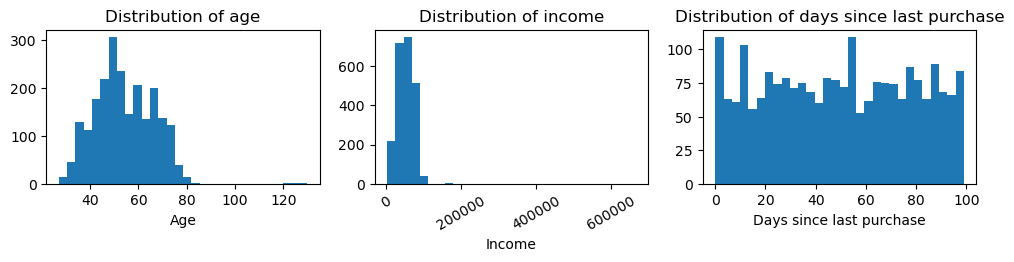

In [29]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 2))
ax1.hist(dataset['Age'], bins = 30)
ax1.set_title('Distribution of age')
ax1.set_xlabel('Age')

ax2.hist(dataset['Income'], bins = 30)
ax2.set_title('Distribution of income')
ax2.set_xlabel('Income')
ax2.tick_params(axis = 'x', labelrotation = 30)

ax3.hist(dataset['Recency'], bins = 30)
ax3.set_title('Distribution of days since last purchase')
ax3.set_xlabel('Days since last purchase')

plt.show()

The distributions of age and income are right skewed and have several outliers on the right.

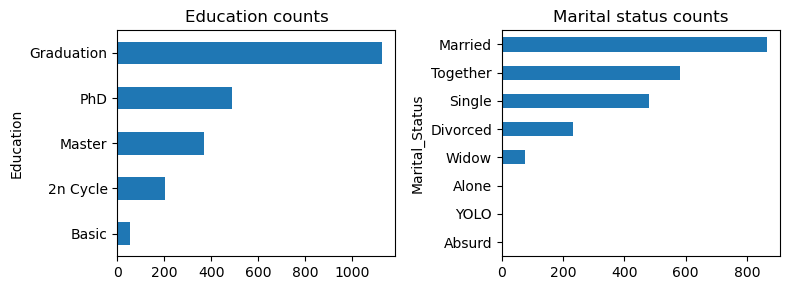

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 3))

dataset.groupby('Education').size().sort_values(ascending=True).plot(kind = 'barh', ax = ax1)
ax1.set_title('Education counts')

dataset.groupby('Marital_Status').size().sort_values(ascending=True).plot(kind = 'barh', ax = ax2)
ax2.set_title('Marital status counts')

plt.tight_layout()
plt.show()

The majority of the customers are graduated from colleges and in a married or together relation.

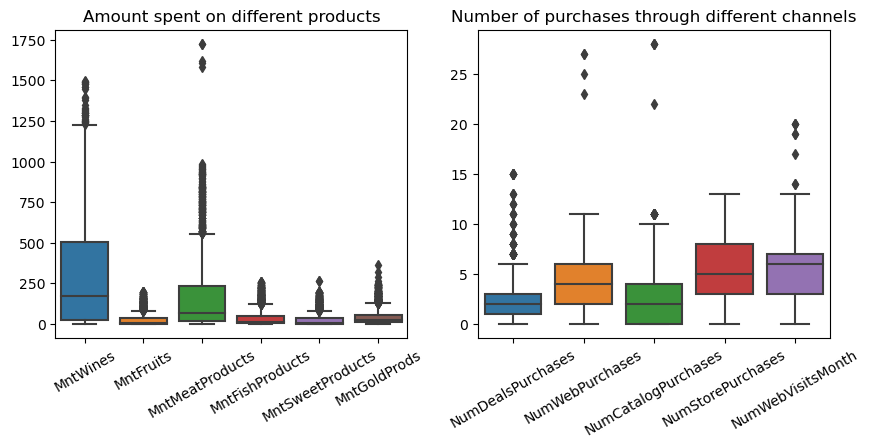

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot(data = dataset[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                            'MntSweetProducts', 'MntGoldProds']], ax = ax1)
ax1.tick_params(axis = 'x', labelrotation = 30)
ax1.set_title('Amount spent on different products')

sns.boxplot(data = dataset[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                            'NumStorePurchases', 'NumWebVisitsMonth']], ax = ax2)
ax2.tick_params(axis = 'x', labelrotation = 30)
ax2.set_title('Number of purchases through different channels')

plt.show()

Comparing to other products, customers spent more on wines and meat.    
The most popular way of purchase is in-store purchase. However, web purchase and catalog purchase have several outliers, meaning some customers are keen on these channels.    

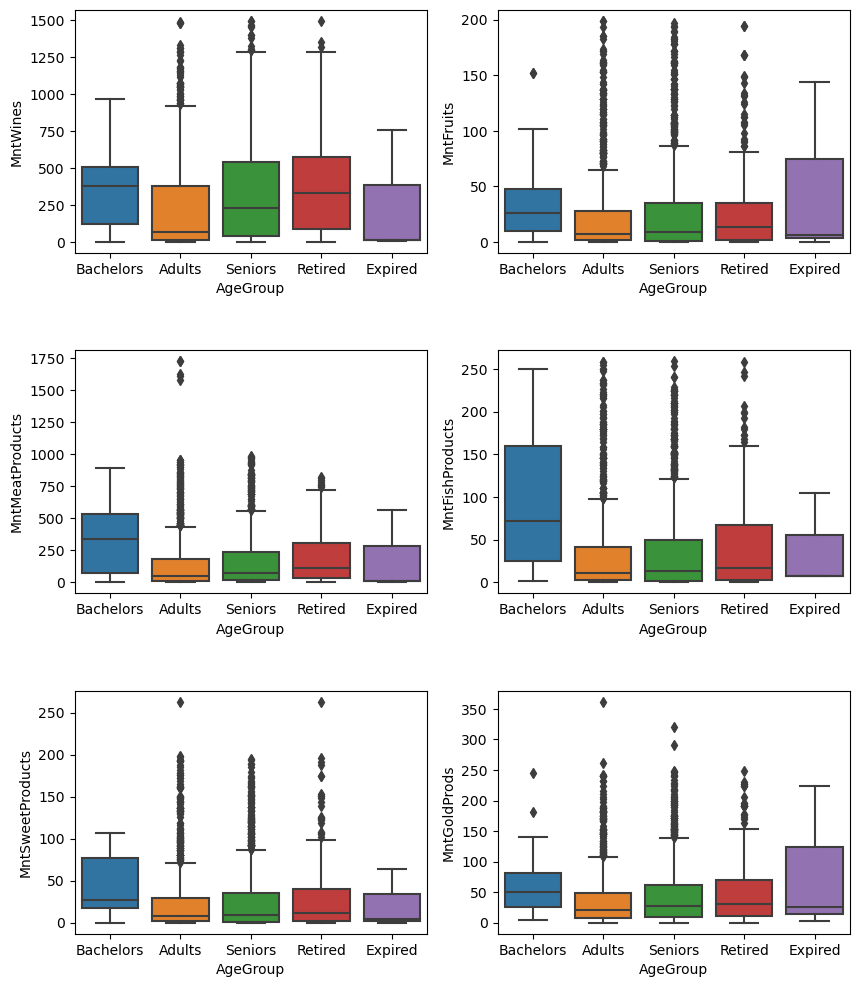

In [25]:
fig, axes = plt.subplots(3, 2, figsize = (10, 12))
age_order = ['Bachelors', 'Adults', 'Seniors', 'Retired', 'Expired']
ax1 = sns.boxplot(x = 'AgeGroup',y = 'MntWines', data = dataset, ax = axes[0, 0], order = age_order)
ax2 = sns.boxplot(x = 'AgeGroup',y = 'MntFruits', data = dataset, ax = axes[0, 1], order = age_order)
ax3 = sns.boxplot(x = 'AgeGroup',y = 'MntMeatProducts', data = dataset, ax = axes[1, 0], order = age_order)
ax4 = sns.boxplot(x = 'AgeGroup',y = 'MntFishProducts', data = dataset, ax = axes[1, 1], order = age_order)
ax5 = sns.boxplot(x = 'AgeGroup',y = 'MntSweetProducts', data = dataset, ax = axes[2, 0], order = age_order)
ax6 = sns.boxplot(x = 'AgeGroup',y = 'MntGoldProds', data = dataset, ax = axes[2, 1], order = age_order)

plt.subplots_adjust(hspace = 0.4) 
plt.show()

Age groups have different product preferences. The bachelors spent more on every categories comparing to other age groups. The adults, seniors, and retired have similar purchase patterns.

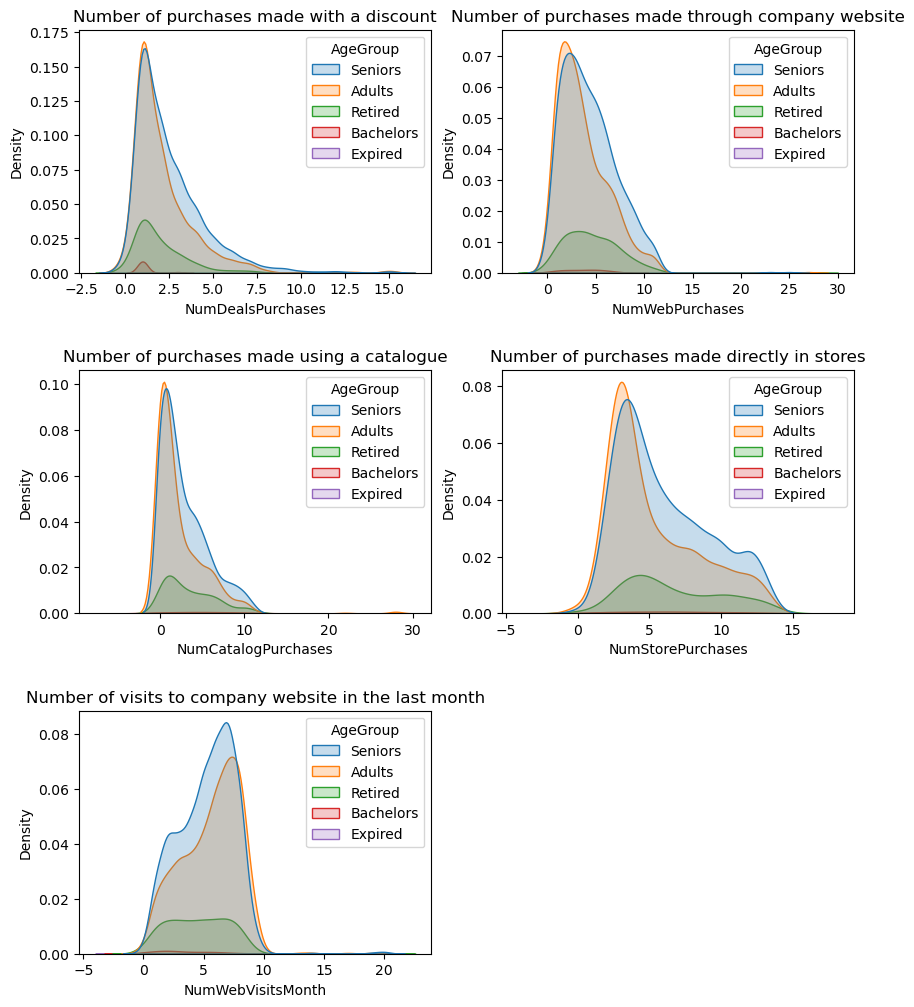

In [26]:
fig, axes = plt.subplots(3, 2, figsize = (10, 12))

ax1 = sns.kdeplot(data = dataset, x = 'NumDealsPurchases', hue = 'AgeGroup', fill = True, ax = axes[0, 0])
ax1.set_title("Number of purchases made with a discount")

ax2 = sns.kdeplot(data = dataset, x = 'NumWebPurchases', hue = 'AgeGroup', fill = True, ax = axes[0, 1])
ax2.set_title("Number of purchases made through company website")

ax3 = sns.kdeplot(data = dataset, x = 'NumCatalogPurchases', hue = 'AgeGroup', fill = True, ax = axes[1, 0])
ax3.set_title("Number of purchases made using a catalogue")

ax4 = sns.kdeplot(data = dataset, x = 'NumStorePurchases', hue = 'AgeGroup', fill = True, ax = axes[1, 1])
ax4.set_title("Number of purchases made directly in stores")

ax5 = sns.kdeplot(data = dataset, x = 'NumWebVisitsMonth', hue = 'AgeGroup', fill = True, ax = axes[2, 0])
ax5.set_title("Number of visits to company website in the last month")

axes[2,1].set_visible(False)

plt.subplots_adjust(hspace = 0.4)
plt.show()

We plot the kde plots with different colors representing different age groups. From the 5 kde plots, there is no obvious diffenrence in shopping channels for different age groups.

#### c. Correlation

In [32]:
dataset_corr = dataset[['Age', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

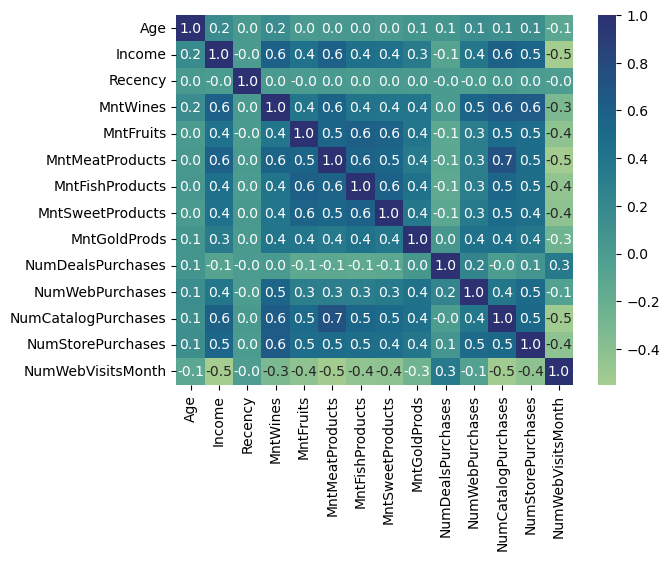

In [33]:
sns.heatmap(dataset_corr.corr(), annot = True, fmt=".1f", cmap = 'crest')
plt.show()

From the heatmap, it can be observed that the strongest positive correlation occurs between the number of catalog purchases and amount spent on meat products. The correlation between household income and the amount spent on wines and meat is also quite strong.

In [18]:
# Transform part of the categorical features into dummies
dataset = pd.get_dummies(dataset, columns=['Education', 'Marital_Status']) 